In [86]:
import numpy as np
import os
#os.environ['CUDARRAY_BACKEND'] = 'numpy'
import deeppy as dp
import matplotlib
import matplotlib.pyplot as plt


# Fetch MNIST data
dataset = dp.dataset.MNIST()
x_train, y_train, x_test, y_test = dataset.data(dp_dtypes=True)

# Bring images to BCHW format
x_train = x_train[:, np.newaxis, :, :]
x_test = x_test[:, np.newaxis, :, :]

# Normalize pixel intensities
scaler = dp.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
# x_train = x_train[(y_train==0) | (y_train==1)]

In [3]:
# y_train = y_train[(y_train==0) | (y_train==1)]
# #y_train[y_train==4] = 1

60

In [87]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [108]:
from sgd import StochasticGradientDescent
from learn_rule_sag import SAG
from idx_input import SupervisedIdxInput

# Prepare network inputs
N_obj = 20000
batch_size = 1
train_input = SupervisedIdxInput(x_train[:N_obj], y_train[:N_obj], batch_size=batch_size)
test_input = dp.Input(x_test)


weight_gain_fc = 1.84
weight_decay_fc = 0.0
net = dp.NeuralNetwork(
    layers=[
        dp.Flatten(),
        dp.FullyConnected(
            n_out=20,
            weights=dp.Parameter(dp.AutoFiller(weight_gain_fc),
                                 weight_decay=weight_decay_fc),
        ),
        dp.ReLU(),
        dp.FullyConnected(
            n_out=10,
            weights=dp.Parameter(dp.AutoFiller(weight_gain_fc),
                                 weight_decay=weight_decay_fc),
        ),
    ],
    loss=dp.SoftmaxCrossEntropy(),
)
net._setup(**train_input.shapes)

# Train network
lrsag = SAG(x_num = N_obj,model = net, L = 10000, use_sag = False)

trainer = StochasticGradientDescent(max_epochs=10, learn_rule=lrsag)
a = trainer.train(net, train_input,adapt_L = True)

INFO:sgd:SGD: Model contains 15910 parameters.
INFO:sgd:SGD: 20000 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 1.816446., L =9900.000000
INFO:sgd:SGD: 1000, cost = 1.470954., L =560178.866890
INFO:sgd:SGD: 2000, cost = 1.631271., L =92274469.442792
INFO:sgd:SGD: 3000, cost = 1.339953., L =4309056.786682
INFO:sgd:SGD: 4000, cost = 1.119063., L =5652387.968805
INFO:sgd:SGD: 5000, cost = 1.685844., L =95099004.990000
INFO:sgd:SGD: 6000, cost = 1.744326., L =46137234.721396
INFO:sgd:SGD: 7000, cost = 1.567936., L =100000000.000000
INFO:sgd:SGD: 8000, cost = 1.279459., L =100000000.000000
INFO:sgd:SGD: 9000, cost = 1.261539., L =613811.047506
INFO:sgd:SGD: 10000, cost = 1.259819., L =20367.230465
INFO:sgd:SGD: 11000, cost = 1.103733., L =29947800.323308
INFO:sgd:SGD: 12000, cost = 1.069370., L =81790693.759723
INFO:sgd:SGD: 13000, cost = 1.100739., L =2373.722410
INFO:sgd:SGD: 14000, cost = 1.031546., L =97029900.000000
INFO:sgd:SGD: 15000, cost = 0.952468., L =49500000.000000
INFO:

!!!  (784, 20)
!!!  (20,)
!!!  (20, 10)
!!!  (10,)


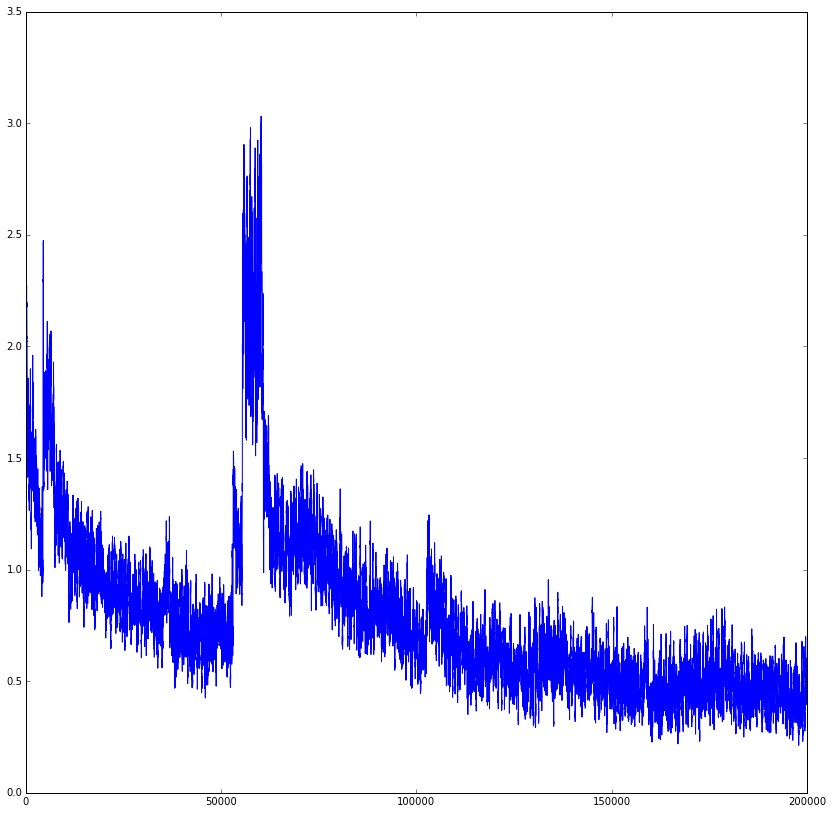

In [109]:
cost_array_sgd = np.array(trainer.cost)
plt.plot(pd.rolling_mean(cost_array_sgd,100))

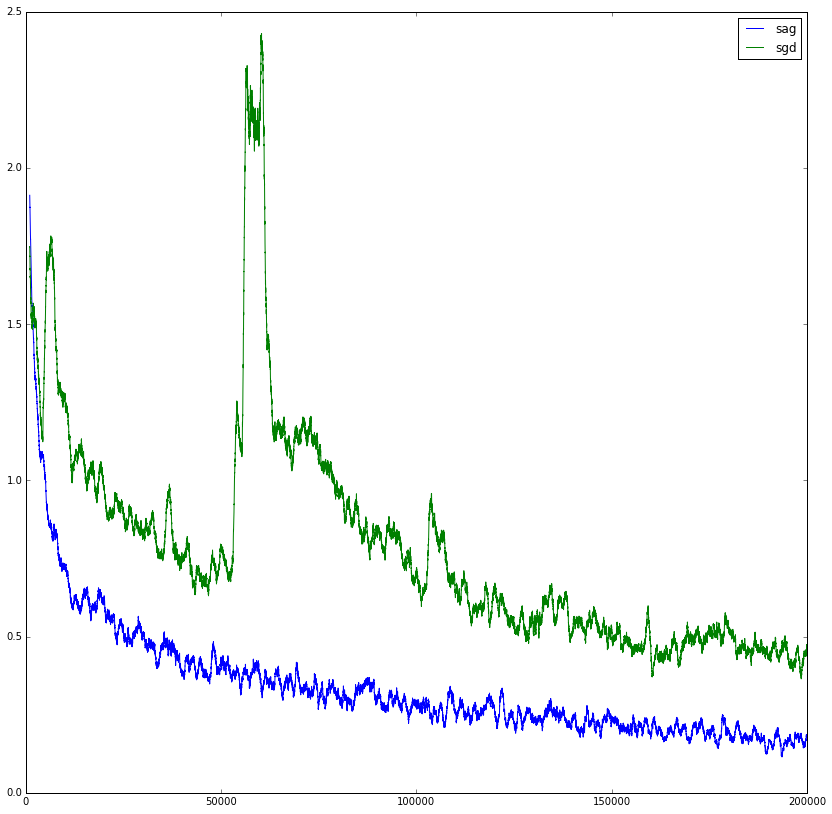

In [112]:
plt.plot(pd.rolling_mean(cost_array,1000),label = 'sag')
plt.plot(pd.rolling_mean(cost_array_sgd,1000),label = 'sgd')
plt.legend()

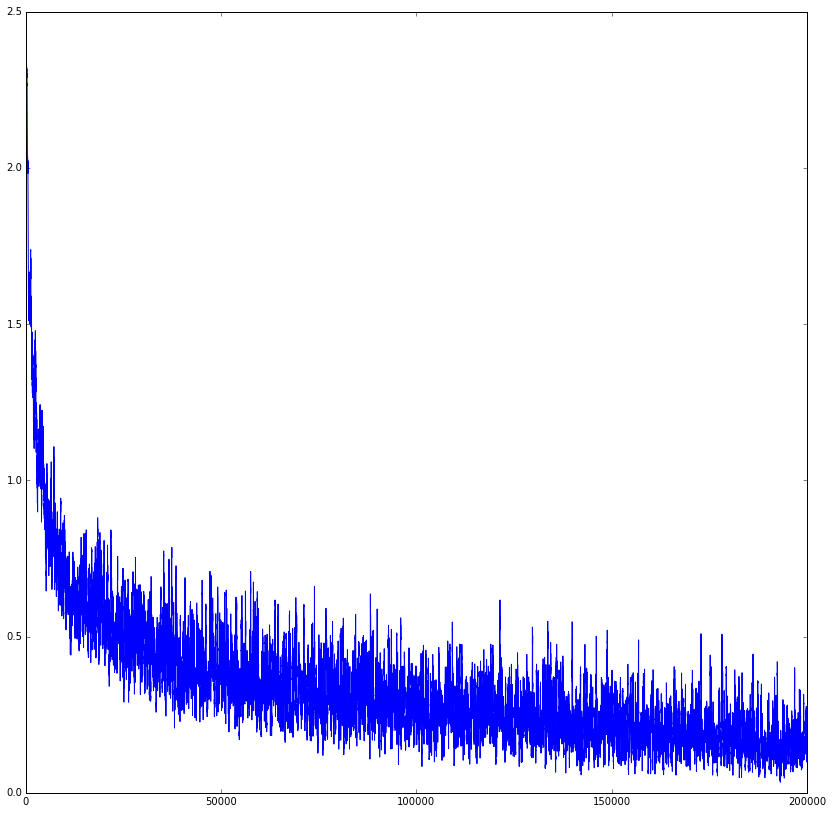

In [107]:
cost_array = np.array(trainer.cost)
plt.plot(pd.rolling_mean(cost_array,100))

In [ ]:
INFO:sgd:SGD: Model contains 7960 parameters.
INFO:sgd:SGD: 20000 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 2.309967., L =9900.000000
INFO:sgd:SGD: 1000, cost = 1.885479., L =859.609943
INFO:sgd:SGD: 2000, cost = 1.571704., L =38313.198493
INFO:sgd:SGD: 3000, cost = 1.342006., L =46603267.395350
INFO:sgd:SGD: 4000, cost = 1.218587., L =100000000.000000
INFO:sgd:SGD: 5000, cost = 1.236931., L =773185.405625
INFO:sgd:SGD: 6000, cost = 1.309749., L =595580.245584
INFO:sgd:SGD: 7000, cost = 1.052648., L =49005000.000000
INFO:sgd:SGD: 8000, cost = 1.066420., L =98010000.000000
INFO:sgd:SGD: 9000, cost = 1.076772., L =5767154.340175
INFO:sgd:SGD: 10000, cost = 1.076831., L =97029900.000000
INFO:sgd:SGD: 11000, cost = 1.143270., L =720894.292522
INFO:sgd:SGD: 12000, cost = 1.059221., L =2883577.170087
INFO:sgd:SGD: 13000, cost = 0.931972., L =5321611.069343
INFO:sgd:SGD: 14000, cost = 1.044676., L =49005000.000000
INFO:sgd:SGD: 15000, cost = 1.119990., L =48514950.000000
INFO:sgd:SGD: 16000, cost = 0.959161., L =50000000.000000
INFO:sgd:SGD: 17000, cost = 0.923010., L =364088.026526
INFO:sgd:SGD: 18000, cost = 0.922752., L =50000000.000000
INFO:sgd:SGD: 19000, cost = 0.999792., L =3632290.088238
INFO:sgd:======== epoch 1/5, cost 1.152776, L =2581776.949486
INFO:sgd:SGD: 0, cost = 2.053215., L =2555959.179991
INFO:sgd:SGD: 1000, cost = 1.037460., L =49005000.000000
INFO:sgd:SGD: 2000, cost = 0.825898., L =12251250.000000
INFO:sgd:SGD: 3000, cost = 0.929602., L =99000000.000000
INFO:sgd:SGD: 4000, cost = 0.938795., L =2844.437707
INFO:sgd:SGD: 5000, cost = 0.874332., L =12375000.000000
INFO:sgd:SGD: 6000, cost = 0.807782., L =12375000.000000
INFO:sgd:SGD: 7000, cost = 1.072824., L =12007450.125000

In [ ]:
INFO:sgd:SGD: Model contains 7872 parameters.
INFO:sgd:SGD: 12665 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 0.739861., L =9900.000000
INFO:sgd:SGD: 1000, cost = 0.029495., L =8438356.532647
INFO:sgd:SGD: 2000, cost = 0.040290., L =15272951.296415
INFO:sgd:SGD: 3000, cost = 0.026127., L =9427842.258369
INFO:sgd:SGD: 4000, cost = 0.055730., L =23529332.079282
INFO:sgd:SGD: 5000, cost = 0.031291., L =9619265.644698
INFO:sgd:SGD: 6000, cost = 0.054542., L =8108494.500550
INFO:sgd:SGD: 7000, cost = 0.066866., L =712987.720791
INFO:sgd:SGD: 8000, cost = 0.029562., L =3594795.117086
INFO:sgd:SGD: 9000, cost = 0.073542., L =1889411.686914
INFO:sgd:SGD: 10000, cost = 0.051018., L =58947.953668
INFO:sgd:SGD: 11000, cost = 0.019552., L =7037334.905949
INFO:sgd:SGD: 12000, cost = 0.014277., L =16893226.226507
INFO:sgd:======== epoch 1/5, cost 0.050430, L =84294319.338393
INFO:sgd:SGD: 0, cost = 0.000005., L =83451376.145009
INFO:sgd:SGD: 1000, cost = 0.018082., L =42147159.669196
INFO:sgd:SGD: 2000, cost = 0.013300., L =490288.417527
INFO:sgd:SGD: 3000, cost = 0.018027., L =9619265.644698
INFO:sgd:SGD: 4000, cost = 0.017717., L =73230336.965440
INFO:sgd:SGD: 5000, cost = 0.013604., L =32130580.104236
INFO:sgd:SGD: 6000, cost = 0.038148., L =47534004.200571
INFO:sgd:SGD: 7000, cost = 0.011063., L =18486481.882486
INFO:sgd:SGD: 8000, cost = 0.009876., L =27084253.798343
INFO:sgd:SGD: 9000, cost = 0.015200., L =35527661.363615
INFO:sgd:SGD: 10000, cost = 0.011744., L =61111723.953287
INFO:sgd:SGD: 11000, cost = 0.015075., L =19244803.944674
INFO:sgd:SGD: 12000, cost = 0.006381., L =55268347.716238
INFO:sgd:======== epoch 2/5, cost 0.016173, L =58116641.411811

In [12]:
all_params = [layer._params for layer in net.layers if isinstance(layer, dp.base.ParamMixin)]
import itertools
list(itertools.chain.from_iterable(all_params))[2].array

IndexError: list index out of range

In [68]:
all_params = [layer._params for layer in net.layers if isinstance(layer, dp.base.ParamMixin)]
import itertools
list(itertools.chain.from_iterable(all_params))

In [75]:
list(itertools.chain.from_iterable(all_params))[1].array

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [80]:
import cudarray as ca
a = ca.ones(1)
ca.copyto()

In [ ]:
ca.copyto()

In [ ]:
all_params = [layer._params for layer in net.layers if isinstance(layer, dp.base.ParamMixin)]

In [43]:
net.layers[1].weights.array

array([[ 0.02466523,  0.02926622, -0.00804913, ..., -0.01076975,
         0.00035506,  0.0375491 ],
       [ 0.03561928,  0.0075506 , -0.03363602, ..., -0.03388797,
         0.03321745,  0.00473165],
       [-0.03563746, -0.00653724,  0.01739672, ...,  0.00461905,
        -0.03491046, -0.02489491],
       ..., 
       [-0.00046198,  0.02712913, -0.0055619 , ..., -0.03282867,
         0.01525066, -0.01874159],
       [-0.01305229,  0.0207435 , -0.00841427, ..., -0.01161721,
         0.01569945,  0.02262931],
       [ 0.00844337, -0.02229576,  0.01688047, ...,  0.00700674,
         0.00500305, -0.01711663]], dtype=float32)

In [49]:
net2.layers[3].weights.array[0] *=0

In [35]:
import copy

In [45]:
net2 = copy.deepcopy(net)

In [ ]:
l.weights.grad_array.shape

In [34]:
net_deep_copy()
net.bprop_untilcopy()

AttributeError: 'NeuralNetwork' object has no attribute 'copy'

In [7]:
import asgd

In [ ]:
asgd.naive_asgd.

In [5]:
sgd

<module 'sgd' from 'sgd.pyc'>

In [ ]:
INFO:sgd:SGD: Model contains 7850 parameters.
INFO:sgd:SGD: 11765 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 0.458890.
INFO:sgd:SGD: 1000, cost = 4.417035.
INFO:sgd:SGD: 2000, cost = 2.626298.
INFO:sgd:SGD: 3000, cost = 2.724252.
INFO:sgd:SGD: 4000, cost = 4.028182.
INFO:sgd:SGD: 5000, cost = 5.343396.
INFO:sgd:SGD: 6000, cost = 1.258388.
INFO:sgd:SGD: 7000, cost = 3.010685.
INFO:sgd:SGD: 8000, cost = 4.121953.
INFO:sgd:SGD: 9000, cost = 2.973456.
INFO:sgd:SGD: 10000, cost = 1.959813.
INFO:sgd:SGD: 11000, cost = 0.451697.
INFO:sgd:======== epoch 1/5, cost 2.983933
INFO:sgd:SGD: 0, cost = 0.210459.
INFO:sgd:SGD: 1000, cost = 1.695387.
INFO:sgd:SGD: 2000, cost = 1.738432.
INFO:sgd:SGD: 3000, cost = 1.367933.
INFO:sgd:SGD: 4000, cost = 0.756829.
INFO:sgd:SGD: 5000, cost = 1.878646.
INFO:sgd:SGD: 6000, cost = 1.430874.
INFO:sgd:SGD: 7000, cost = 0.844486.
INFO:sgd:SGD: 8000, cost = 0.878055.
INFO:sgd:SGD: 9000, cost = 1.085068.
INFO:sgd:SGD: 10000, cost = 1.401724.
INFO:sgd:SGD: 11000, cost = 0.572834.
INFO:sgd:======== epoch 2/5, cost 1.292209
INFO:sgd:SGD: 0, cost = 0.242451.
INFO:sgd:SGD: 1000, cost = 0.945775.
INFO:sgd:SGD: 2000, cost = 0.640329.
INFO:sgd:SGD: 3000, cost = 0.685407.
INFO:sgd:SGD: 4000, cost = 0.545519.
INFO:sgd:SGD: 5000, cost = 0.614893.
INFO:sgd:SGD: 6000, cost = 0.697633.
INFO:sgd:SGD: 7000, cost = 0.435023.
INFO:sgd:SGD: 8000, cost = 0.552319.
INFO:sgd:SGD: 9000, cost = 0.227984.
INFO:sgd:SGD: 10000, cost = 0.573232.
INFO:sgd:SGD: 11000, cost = 0.468296.
INFO:sgd:======== epoch 3/5, cost 0.554686
INFO:sgd:SGD: 0, cost = 0.040424.
INFO:sgd:SGD: 1000, cost = 0.539330.
INFO:sgd:SGD: 2000, cost = 0.402364.
INFO:sgd:SGD: 3000, cost = 0.295983.
INFO:sgd:SGD: 4000, cost = 0.283400.
INFO:sgd:SGD: 5000, cost = 0.231612.
INFO:sgd:SGD: 6000, cost = 0.510239.
INFO:sgd:SGD: 7000, cost = 0.233825.
INFO:sgd:SGD: 8000, cost = 0.396255.
INFO:sgd:SGD: 9000, cost = 0.330065.
INFO:sgd:SGD: 10000, cost = 0.488871.
INFO:sgd:SGD: 11000, cost = 0.492779.
INFO:sgd:======== epoch 4/6, cost 0.360764
INFO:sgd:SGD: 0, cost = 0.028409.
INFO:sgd:SGD: 1000, cost = 0.420549.
INFO:sgd:SGD: 2000, cost = 0.310715.
INFO:sgd:SGD: 3000, cost = 0.532655.
INFO:sgd:SGD: 4000, cost = 0.231054.
INFO:sgd:SGD: 5000, cost = 0.244247.
INFO:sgd:SGD: 6000, cost = 0.241243.
INFO:sgd:SGD: 7000, cost = 0.301002.
INFO:sgd:SGD: 8000, cost = 0.323839.
INFO:sgd:SGD: 9000, cost = 0.387525.
INFO:sgd:SGD: 10000, cost = 0.294373.
INFO:sgd:SGD: 11000, cost = 0.187335.
INFO:sgd:======== epoch 5/7, cost 0.318993
INFO:sgd:SGD: 0, cost = 0.040776.
INFO:sgd:SGD: 1000, cost = 0.348480.
INFO:sgd:SGD: 2000, cost = 0.333066.
INFO:sgd:SGD: 3000, cost = 0.279392.
INFO:sgd:SGD: 4000, cost = 0.465469.
INFO:sgd:SGD: 5000, cost = 0.204539.
INFO:sgd:SGD: 6000, cost = 0.783240.
INFO:sgd:SGD: 7000, cost = 0.461821.
INFO:sgd:SGD: 8000, cost = 0.263990.
INFO:sgd:SGD: 9000, cost = 0.242737.
INFO:sgd:SGD: 10000, cost = 0.305832.
INFO:sgd:SGD: 11000, cost = 0.307616.
INFO:sgd:======== epoch 6/9, cost 0.291276
INFO:sgd:SGD: 0, cost = 0.194865.
INFO:sgd:SGD: 1000, cost = 0.515789.
INFO:sgd:SGD: 2000, cost = 0.258697.
INFO:sgd:SGD: 3000, cost = 0.183047.
INFO:sgd:SGD: 4000, cost = 0.164617.
INFO:sgd:SGD: 5000, cost = 0.682310.
INFO:sgd:SGD: 6000, cost = 0.129562.
INFO:sgd:SGD: 7000, cost = 0.401927.
INFO:sgd:SGD: 8000, cost = 0.258269.
INFO:sgd:SGD: 9000, cost = 0.279894.
INFO:sgd:SGD: 10000, cost = 0.191039.
INFO:sgd:SGD: 11000, cost = 0.423675.
INFO:sgd:======== epoch 7/9, cost 0.293093
INFO:sgd:SGD: 0, cost = 2.072477.
INFO:sgd:SGD: 1000, cost = 0.302095.
INFO:sgd:SGD: 2000, cost = 0.186857.
INFO:sgd:SGD: 3000, cost = 0.204608.
INFO:sgd:SGD: 4000, cost = 0.245559.
INFO:sgd:SGD: 5000, cost = 0.264163.
INFO:sgd:SGD: 6000, cost = 0.225029.
INFO:sgd:SGD: 7000, cost = 0.188798.
INFO:sgd:SGD: 8000, cost = 0.350346.
INFO:sgd:SGD: 9000, cost = 0.284401.
INFO:sgd:SGD: 10000, cost = 0.246687.
INFO:sgd:SGD: 11000, cost = 0.470493.
INFO:sgd:======== epoch 8/9, cost 0.290027
INFO:sgd:SGD: 0, cost = 0.114586.
INFO:sgd:SGD: 1000, cost = 0.242059.
INFO:sgd:SGD: 2000, cost = 0.236183.
INFO:sgd:SGD: 3000, cost = 0.200174.
INFO:sgd:SGD: 4000, cost = 0.327526.
INFO:sgd:SGD: 5000, cost = 0.184101.
INFO:sgd:SGD: 6000, cost = 0.416828.
INFO:sgd:SGD: 7000, cost = 0.198218.
INFO:sgd:SGD: 8000, cost = 0.296629.
INFO:sgd:SGD: 9000, cost = 0.235172.
INFO:sgd:SGD: 10000, cost = 0.233036.
INFO:sgd:SGD: 11000, cost = 0.382469.
INFO:sgd:======== epoch 9/13, cost 0.287628
INFO:sgd:SGD: 0, cost = 0.006652.
INFO:sgd:SGD: 1000, cost = 0.320464.
INFO:sgd:SGD: 2000, cost = 0.331575.
INFO:sgd:SGD: 3000, cost = 0.563375.
INFO:sgd:SGD: 4000, cost = 0.167224.
INFO:sgd:SGD: 5000, cost = 0.220077.
INFO:sgd:SGD: 6000, cost = 0.480035.
INFO:sgd:SGD: 7000, cost = 0.321976.
INFO:sgd:SGD: 8000, cost = 0.259819.
INFO:sgd:SGD: 9000, cost = 0.330385.
INFO:sgd:SGD: 10000, cost = 0.142308.
INFO:sgd:SGD: 11000, cost = 0.403927.
INFO:sgd:======== epoch 10/15, cost 0.282270
INFO:sgd:SGD: Stopped by max_epochs.

In [112]:
0.25*(np.max(np.linalg.norm(x_train.reshape((60000,-1)),axis=1))+1)


12.476409912109375

In [ ]:
INFO:sgd:SGD: Model contains 7850 parameters.
INFO:sgd:SGD: 20000 gradient updates per epoch.
INFO:sgd:SGD: 0, cost = 2.218066.
INFO:sgd:SGD: 1000, cost = 2.695839.
INFO:sgd:SGD: 2000, cost = 2.463513.
INFO:sgd:SGD: 3000, cost = 2.414884.
INFO:sgd:SGD: 4000, cost = 2.336373.
INFO:sgd:SGD: 5000, cost = 2.183285.
INFO:sgd:SGD: 6000, cost = 2.032248.
INFO:sgd:SGD: 7000, cost = 1.867176.
INFO:sgd:SGD: 8000, cost = 1.696344.
INFO:sgd:SGD: 9000, cost = 1.397496.
INFO:sgd:SGD: 10000, cost = 1.333949.
INFO:sgd:SGD: 11000, cost = 1.374232.
INFO:sgd:SGD: 12000, cost = 1.297172.
INFO:sgd:SGD: 13000, cost = 1.216552.
INFO:sgd:SGD: 14000, cost = 1.382218.
INFO:sgd:SGD: 15000, cost = 0.969789.
INFO:sgd:SGD: 16000, cost = 0.916342.
INFO:sgd:SGD: 17000, cost = 1.282511.
INFO:sgd:SGD: 18000, cost = 0.533705.
INFO:sgd:SGD: 19000, cost = 0.628567.
INFO:sgd:======== epoch 1/5, cost 1.572128
INFO:sgd:SGD: 0, cost = 2.166318.
INFO:sgd:SGD: 1000, cost = 0.582403.
INFO:sgd:SGD: 2000, cost = 0.684643.
INFO:sgd:SGD: 3000, cost = 0.428067.
INFO:sgd:SGD: 4000, cost = 0.386918.
INFO:sgd:SGD: 5000, cost = 0.535594.
INFO:sgd:SGD: 6000, cost = 0.420161.
INFO:sgd:SGD: 7000, cost = 0.676061.
INFO:sgd:SGD: 8000, cost = 0.612575.
INFO:sgd:SGD: 9000, cost = 0.496174.
INFO:sgd:SGD: 10000, cost = 0.690191.
INFO:sgd:SGD: 11000, cost = 0.863458.
INFO:sgd:SGD: 12000, cost = 0.754025.
INFO:sgd:SGD: 13000, cost = 0.804344.
INFO:sgd:SGD: 14000, cost = 1.449844.
INFO:sgd:SGD: 15000, cost = 0.463697.
INFO:sgd:SGD: 16000, cost = 0.468017.
INFO:sgd:SGD: 17000, cost = 0.949975.
INFO:sgd:SGD: 18000, cost = 0.262370.
INFO:sgd:SGD: 19000, cost = 0.372363.
INFO:sgd:======== epoch 2/5, cost 0.620700
INFO:sgd:SGD: 0, cost = 2.280579.
INFO:sgd:SGD: 1000, cost = 0.461465.
INFO:sgd:SGD: 2000, cost = 0.720628.
INFO:sgd:SGD: 3000, cost = 0.472169.
INFO:sgd:SGD: 4000, cost = 0.490910.
INFO:sgd:SGD: 5000, cost = 0.805294.
INFO:sgd:SGD: 6000, cost = 0.638910.
INFO:sgd:SGD: 7000, cost = 0.863758.
INFO:sgd:SGD: 8000, cost = 1.480307.
INFO:sgd:SGD: 9000, cost = 0.601672.
INFO:sgd:SGD: 10000, cost = 0.454915.
INFO:sgd:SGD: 11000, cost = 1.036458.
INFO:sgd:SGD: 12000, cost = 0.709317.
INFO:sgd:SGD: 13000, cost = 0.673329.
INFO:sgd:SGD: 14000, cost = 0.978068.
INFO:sgd:SGD: 15000, cost = 0.593450.
INFO:sgd:SGD: 16000, cost = 0.671145.
INFO:sgd:SGD: 17000, cost = 0.715100.
INFO:sgd:SGD: 18000, cost = 0.253789.
INFO:sgd:SGD: 19000, cost = 0.381105.
INFO:sgd:======== epoch 3/5, cost 0.669974
INFO:sgd:SGD: 0, cost = 0.230296.

In [93]:
gg = [np.array(x[0]) for x in  a]
weight_matrix = np.hstack(gg)

In [99]:
hdump(aa,'mat.h',compression='gzip')

dumping <type 'numpy.ndarray'> to file <HDF5 file "mat.h" (mode r+)>


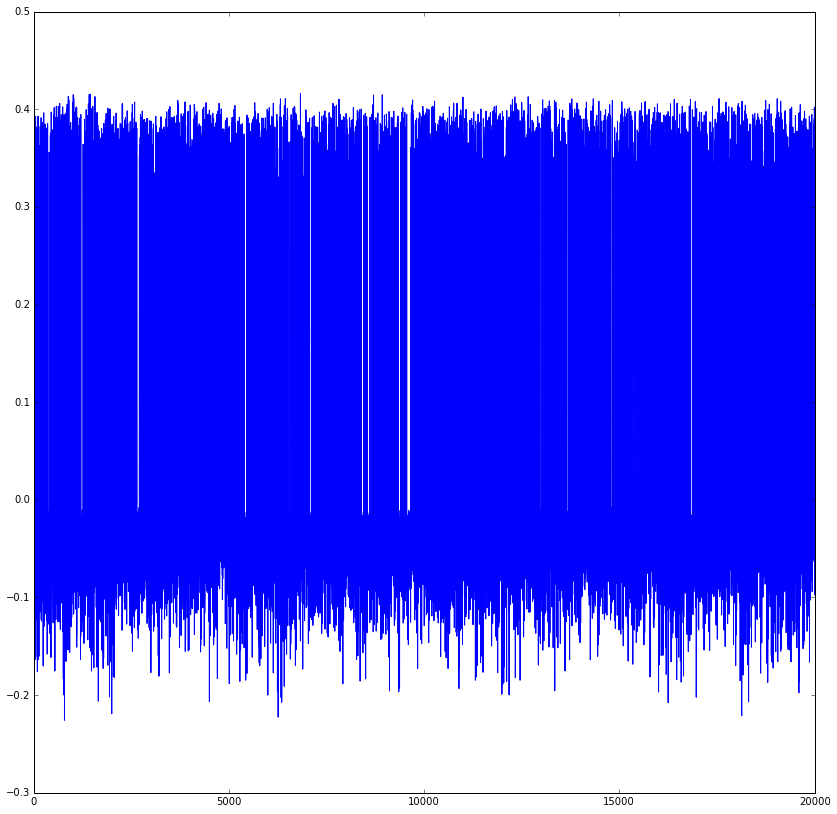

In [96]:
plt.plot(aa[:,0])

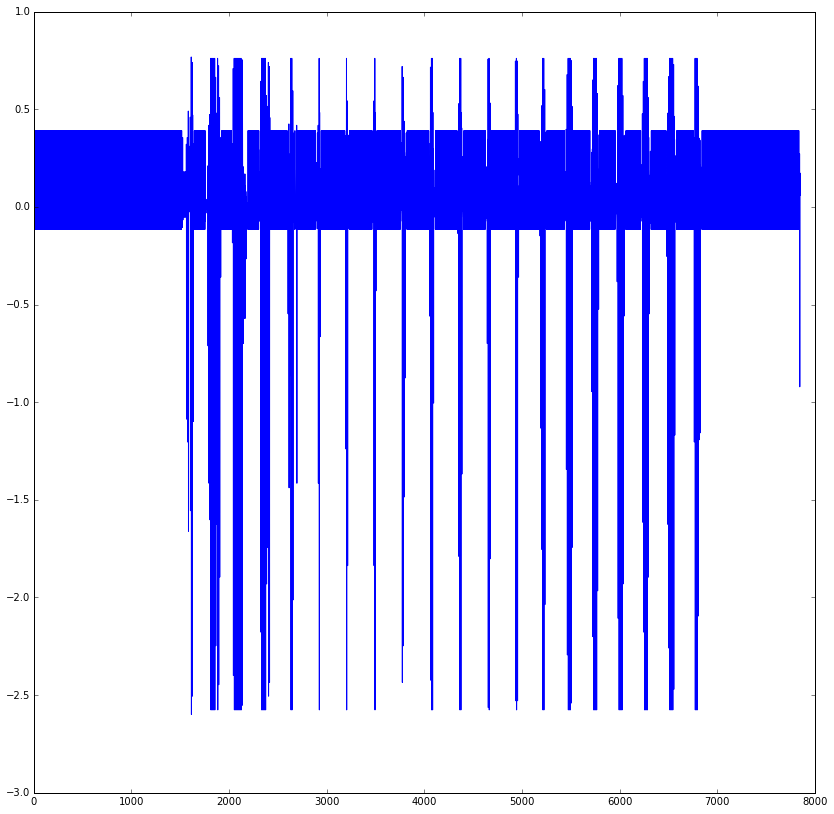

In [71]:
plt.plot(aa[0,:])